**Problem 1** Bernoulli Trials

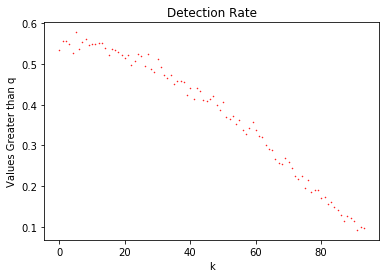

In [6]:
import numpy as U

def bGenFn(p,p1,M,N,k): 

    kTrials = U.random.binomial(1,p,(M,k))
    NkTrials = U.random.binomial(1,p1,(M,N-k))
    bMx = U.concatenate((kTrials,NkTrials),axis=1)
    
    return bMx

def bLogFn(bMx_,p,p1,N,k):         #Taking log of probabilities (k=good;N-k=bad)
    bMx1 = bMx_[:, 0:k]      #Call first k entries from bMx_
    bSum1 = U.sum(bMx1,axis=1)  #Sum the first k entries
    bMx2 = bMx_[:, k:N]      #Call last N-k entries from bMx_
    bSum2 = U.sum(bMx2,axis=1)  #Sum the last N-k entries
    bLog1 = bSum1*(U.log(p)-U.log(1-p))+k*U.log(1-p)     
    bLog2 = bSum2*(U.log(p1)-U.log(1-p1))+(N-k)*U.log(1-p1)   
    bLog = bLog1 + bLog2
    
    return bLog

def bLogAltFn(bMx_,p,p1,N,d):
    bLogAltSum = 0
    for k in range(0,N-d):
        
        bLogAlt = U.exp(bLogFn(bMx_,p,p1,N,k)) 
        
        bLogAltSum = bLogAltSum + bLogAlt      #cumulative sum
    
    LogAverage = U.log(bLogAltSum / (N-d))     #log of averages
    
    return LogAverage

def cutoffFn(p,p1,M,N,d,q):
    Null = bGenFn(p,p,M,N,N)  #creating Null matrix
    bLog_1 = bLogFn(Null,p,p1,N,N)             #Evaluate Null hyp
    bLogAlt_1 = bLogAltFn(Null,p,p1,N,d)       #Evaluate Alt hyp
    bDiff = U.sort(bLogAlt_1 - bLog_1)            #Log of LR
    Cutoff = U.percentile(bDiff,q)
    
    return Cutoff

#assign values for trial generation:
p = 0.05
p1 = 0.1
M = 5000
N = 100
k = 100
d = 6
q = 95

#Trial generation code (NOT part of pull file):
%matplotlib inline
import matplotlib.pyplot as P

for k in range(0,N-d):
    CutVal = cutoffFn(p,p1,M,N,d,q)
    AltnMx = bGenFn(p,p1,M,N,k)
    #evaluate Logs and find the difference btwn Logs and Averages of Logs
    bLog_2 = bLogFn(AltnMx,p,p,N,N)  #testing Null Hypothesis under assumption it does not go bad (how many docs "going bad")?
    bLogAlt_2 = bLogAltFn(AltnMx,p,p1,N,d)  #testing where it goes bad (closer to alt or null hypothesis)?
    bDiff2 = U.sort(bLogAlt_2 - bLog_2)   #Log of LR (for each scenario --> there's (N-d) scenarios to test)
    #finding values greater than qth percentile
    ValBigQ = bDiff2>=CutVal  #need proportionate values not actual values - do the sum of these
    SumValBigQ = U.sum(ValBigQ)/M  #Sum of ratios greater than cutoff divided by number of trial sequences (rows) gives proportion detected
    #plot detection rate
    P.plot(k,SumValBigQ, 'ro', markersize=0.5)
    P.ylabel('Values Greater than q')
    P.xlabel('k')
    P.title('Detection Rate')
P.show()

cutoffVec =  [ 0.          0.          0.          0.          0.          0.          0.
  1.11595825  1.08929001  1.36578783  1.03668371  1.63359544  1.04525272
  1.61478996  1.12435108  1.5065188   1.56383856  1.60753361  1.33650965
  1.38969884  1.48764752  1.62362162  1.75816449  1.65431981  1.68008257
  1.68592706  1.84248698  1.45580884  1.73391992  1.74006081  1.57194001
  1.53197967  1.64373599  1.40147497  1.42461094  1.64565782  1.97801316
  1.58658914  2.02574587  1.50544999  1.63691052  1.85404337  1.80989263
  1.67997171  1.90977368  1.96164466  1.73313047  1.86833684  1.64947515
  1.85560274  1.68785446  1.85115888  1.7540425   1.73355099  1.48028015
  2.01565756  1.63712025  1.83112153  1.59872344  1.76882461  1.79195818
  1.58336698  1.84737379  2.04726945  1.96972442  1.91927878  2.25887528
  2.02085964  1.744386    1.53316646  2.0884778   2.43582777  2.17372928
  1.89907857  1.68192304  1.84048965  2.42280528  2.25008362  1.92764645
  2.01449095  1.95909246  1.868549

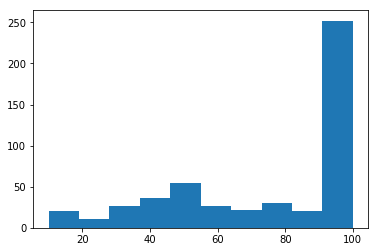

In [61]:
#PROBLEM 4E
%matplotlib inline
import matplotlib.pyplot as P
import numpy as U
%run bernoulliFns.py

# Initialize variables: M,N,p,p1,d,q
M = 500
N = 100
p = 0.05
p1 = 0.1
d = 6
q = 99

### generate cutoff value corresponding to specified false alarm rate:
    #  ? generate matrix of trials according to null hypothesis (failure prob. = p for all trials)
    #  ? generate log probability vector for this trial matrix under H0 (all trials p)
    #   generate log probability vector for same matrix under alternative hypothesis (p changes to p1 somewhere)
    #   difference between alt. and null log probability vectors--this is the statistic used to distinguish
    #   find cutoff corresponding to false alarm rate
cutoffVec = U.zeros(N)
for n in range(d+1,N):
    cutoffVal = cutoffFn(p,p1,M,n,d,q)
    cutoffVec[n]=cutoffVal
print("cutoffVec = ",cutoffVec)   


#PROBLEM 4F:
k = 25
###compute missed detection rate for different scenarios where probability changes to p1
bMx = bGenFn(p,p1,M,N,k)
logProbMx = U.zeros((M,N))

# Loop over trial # at which prob changes to p1 (index ii can be from first trial to N-d'th trial)
for n in range(d+1,N):  
    bLog = bLogFn(bMx,p,p,n,n)  #based off of null hypothesis
    bLogAlt = bLogAltFn(bMx,p,p1,n,d)
    LR = bLogAlt - bLog    # ? find difference: log probability vector assuming alt - log prob. vector assuming null
    logProbMx[:,n] = LR > cutoffVec[n]  # see what proportion of these values are above the cutoff--this is the detection rate at this ii

detectVec = N*U.ones(M)

for j in range(0,M):
    temp = U.nonzero(logProbMx[j,:])
    if len(temp[0]) > 0:
        detectVec[j] = temp[0][0]

#plot the detection rate
P.hist(detectVec)
P.show()


**Problem 2** Research Problem #2

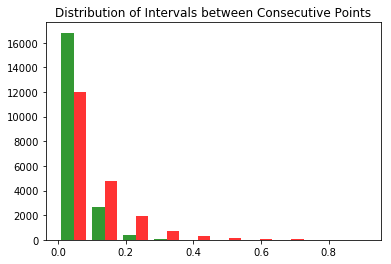

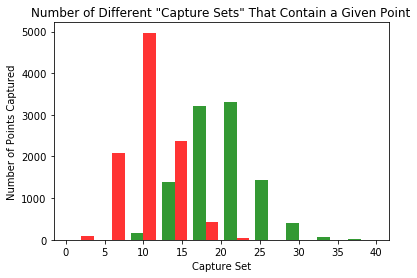

In [27]:
import numpy as M
L = 1000     #set segment length L (using smaller values to test code)
N = 10000    #number of points N (using smaller values to test code)

S = M.random.uniform(0,L,M.int(N))
S2 = S - 1
S3 = S - 1 + L

S2 = S2[S2>=0]        #searches value-by-value and selects only >=0
S3 = S3[S3>=0]

SuS2 = M.sort(M.concatenate((S,S2),axis=0))
SuS3 = M.sort(M.concatenate((S,S3),axis=0))

DiffList1 = M.diff(SuS2)   #googled
DiffList2 = M.diff(SuS3)
    
%matplotlib inline
import matplotlib.pyplot as P

P.hist([DiffList1,DiffList2], color=['g','r'], alpha=0.8)
P.title('Distribution of Intervals between Consecutive Points')
P.show()

print('')
print('')

CountTotal1 = []
CountTotal2 = []
for i in range(0,N):     
    s = S[i]
    Count1 = ((s-1 < S) & (S < s)).sum()   #googled this formula in a python blog
    Count2 = ((s-1 < S2) & (S2 < s)).sum()
    Count3 = ((s-1 < S3) & (S3 < s)).sum()
    CountTotal1.append((Count1 + Count2))
    CountTotal2.append((Count1 + Count3))
    
P.hist([CountTotal1,CountTotal2], color=['g','r'], alpha=0.8)  #Number of sets that s_i is included in
P.title('Number of Different "Capture Sets" That Contain a Given Point')
P.xlabel('Capture Set')
P.ylabel('Number of Points Captured')
P.show()  
